In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from textCleaner import clean_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

directory = './data/'

This notebook shows how we trained our regression model on a TF-IDF matrix while using N-grams.
Here is an overview of the steps we took:
1. Import the data 
2. Preprocess the data 
3. Cross validation on the number of grams to use 
4. Plott the results and conclunding 

### 1) Load the pickled data 

In [4]:
# Load the data from pickle file
with open(directory + 'train_sample.pickle', 'rb') as f:
    train_sample  = pickle.load(f)

train_sample.sample(10)

,text,label
569849,<user> hey kaleem can you follow my band <user...,1
770378,"lyk i saw u sum wher ... rt <user> "" <user> k ...",1
222283,<user> we are going to try the jello jigglers ...,1
1033138,"when you're in a relationship and it's good , ...",1
2241272,` metra 99-7505 single or double din installat...,-1
2405371,from my blog : shirtless saturday : hot gay gu...,-1
118989,"<user> well in that case , i'm glad you didn't...",1
541935,<user> oppa loves you the most,1
990229,february as cold as my heart,1
1012033,<user> <user> love this one ! <url>,1


### 2) Preprocess the data

In [ ]:
train_sample['cleaned'] = train_sample['text'].apply(lambda text : clean_text(text, remove_stopwords=False))

In [4]:
train_sample.sample(10)

,text,label,cleaned
1596268,"bahlsen hit cream sandwich cookies , 5.3- ounc...",-1,"bahlsen hit cream sandwich cooky , <number> - ..."
1788564,<user> i work till 4pm either i bring my shit ...,-1,<user> i work till <time> either i bring my sh...
1066496,<user> haha its all good . i was bout to say y...,1,<user> haha it all good . i wa about to say yo...
236204,"let me ride till the sun rises ,",1,"let me ride till the sun rise ,"
2445015,fuji 3 - pack 120 - minute vhs tapes ( hqt 120...,-1,fuji <number> - pack <number> - minute vhs tap...
557595,it's always that one person i know i can talk ...,1,it's always that one person i know i can talk ...
71957,proud of myself for actually coming to my one ...,1,proud of myself for actually coming to my one ...
1047306,<user> i really loved reading that review !,1,<user> i really loved reading that review !
650857,thank god it's friday have a bless day ),1,thank god it's friday have a bless day )
2141506,"nights like this , i wish we could talk like w...",-1,"night like this , i wish we could talk like we..."


### 3) Cross validation on the number of grams to use 

In [ ]:
# Create a dictionary to keep track of the number of features for each ngram_range
shapes = {}
# Create a dictionary to keep track of the accuracy for each ngram_range
accuracy = {}
# Create a dictionary to keep track of the standard deviation for each ngram_range
std = {}


for n in range(1,8):

    # Create a TF-IDF matrix with n-grams, and keep only the grams that appear at least 10 times
    vectorizer = TfidfVectorizer(ngram_range=(1, n), min_df = 10)
    # Fit the vectorizer on the training data
    X = vectorizer.fit_transform(train_sample['cleaned'])
    # Define the labels
    y = train_sample['label'].values

    # Store the number of features
    shapes[n] = X.shape

    # Define the model
    model = LogisticRegression(C = 4, max_iter = 10000, n_jobs=-1)
    # Evaluate the model's performance using cross-validation
    scores = cross_val_score(model, X, y, cv=5)

    # Store the accuracy and standard deviation
    accuracy[n] = scores.mean()
    std[n] = scores.std()
    


In [5]:
# Cre ate a dataframe with the results
df = pd.DataFrame({'accuracy': accuracy, 'std': std, 'nb_features': shapes[1]})
df.index.name = 'ngram_range'
df

,accuracy,std,nb_features
ngram_range,,,
1,0.816046,0.02,48240
2,0.849083,0.02,296074
3,0.853882,0.02,553431
4,0.854548,0.02,699463
5,0.854473,0.02,778784
6,0.854505,0.02,831362
7,0.854502,0.02,872764


### 4) Plott the results and conclunding 

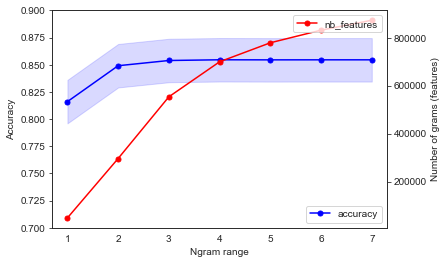

In [32]:
# plot the accuracy as a line and the standard deviation as a shaded area
sns.set_style('white')
plt.figure(figsize=(6,4))
plt.plot(df.index, df['accuracy'], color='blue', marker='o', markersize=5, label='accuracy')
plt.fill_between(df.index, df['accuracy'] + df['std'], df['accuracy'] - df['std'], alpha=0.15, color='blue')
plt.xlabel('Ngram range')
plt.ylabel('Accuracy')
# add a legend for the line and the shaded area
plt.legend(loc='lower right') 
plt.ylim([0.7, 0.9])
# on a different axis, plot the number of features
ax2 = plt.twinx()
ax2.plot(df.index, df['nb_features'], color='red', marker='o', markersize=5, label='nb_features')
ax2.set_ylabel('Number of grams (features)')
ax2.legend(loc='upper right')

plt.show()


From the above figure we can see that the 3-grams are the last grams that significantly affect the accuracy (≃ 85%) of the model while presenting the advantage of being less parameterized (<600 000 features) than the following grams.